In [17]:
import numpy as np
import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
from skimage import color, io
import cv2

def grad(x):
    return np.array(np.gradient(x))


def norm(x, axis=0):
    return np.sqrt(np.sum(np.square(x), axis=axis))


def stopping_fun(x, alpha=1):
    return 1. / (1. + alpha * norm(grad(x))**2)


img = cv2.imread('2.bmp', cv2.IMREAD_GRAYSCALE)
# img = color.rgb2gray(img)
img = (img - np.mean(img)) / np.std(img)
img = cv2.resize(img,(200,200))
print(img.shape)

# Smooth the image to reduce noise and separation between noise and edge becomes clear
# img_smooth = scipy.ndimage.filters.gaussian_filter(img, sigma=2)

F = stopping_fun(img)

image = img

(200, 200)


In [18]:
from skimage import measure
from skimage.filters import gabor_kernel
from scipy import ndimage as nd

# prepare filter bank kernels
kernels = []
for theta in range(6):
    theta = theta / 6. * np.pi
#     for sigma in (1, 3):
    for sigma in range(1,4):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

def default_phi(x, y):
    c0 = 1
    phi = c0 * np.ones(image.shape)
    w = 5
    phi[x-w:x+w, y-w:y+w] = -c0
    return phi


dt = 1.
n_iter = 200
x, y = 100,100
phi = default_phi(x,y)


def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = nd.convolve(image, kernel, mode='wrap')
#         cv2.imshow('f',filtered)
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats
    
# window_scribble = image[x-8:x+8, y-8:y+8]
# scribble_feats = compute_feats(window_scribble, kernels)

# top, bottom, left, right = 8, 7, 8, 7
# WHITE = [255, 255, 255]
# padded_img = cv2.copyMakeBorder(image, top , bottom, left, right, cv2.BORDER_REPLICATE, value=WHITE)

# F = np.zeros(image.shape, dtype=np.double)
# step = 4
# for i in range(8, padded_img.shape[0]-8, step):
#     for j in range(8, padded_img.shape[0]-8, step):

#         feats = compute_feats(padded_img[i-8:i+8, j-8:j+8], kernels)
# #                 print(i,j)
#         F[i-8:i-8+step, j-8:j-8+step] = np.sum((feats - scribble_feats)**2)
#         F[i-8:i-8+step, j-8:j-8+step] = np.sqrt(F[i-8:i-8+step, j-8:j-8+step])

# F = 1 / (1+F)

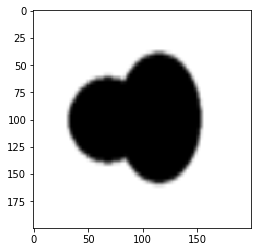

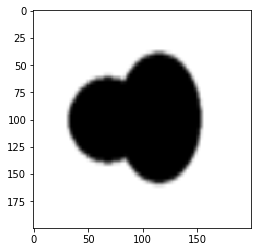

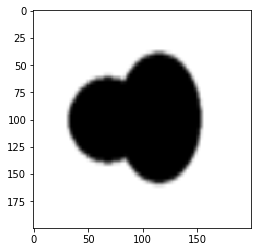

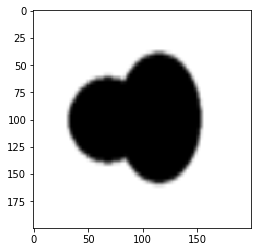

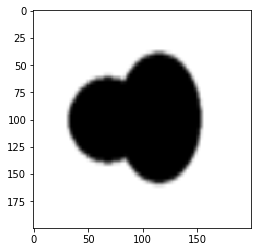

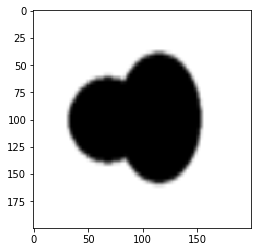

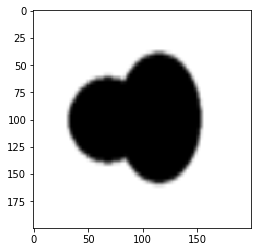

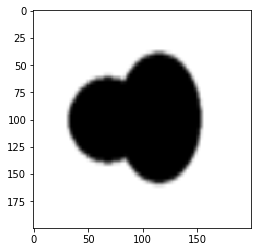

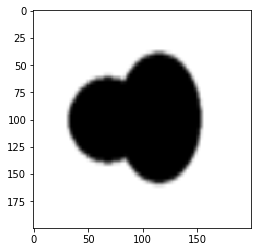

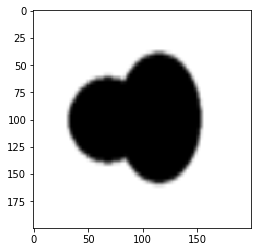

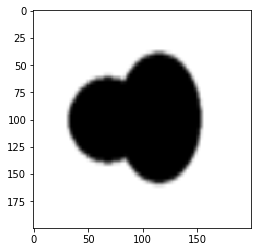

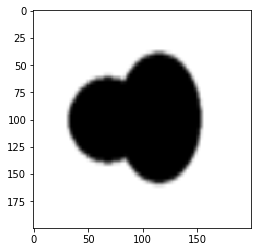

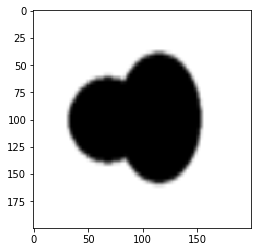

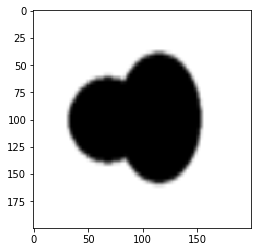

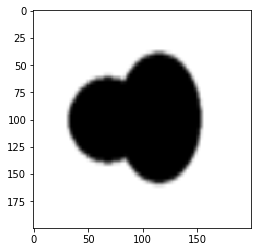

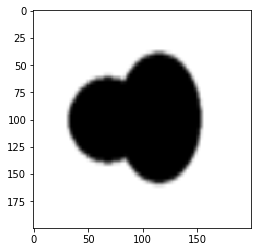

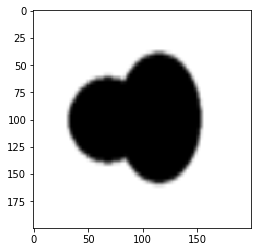

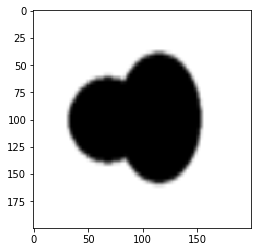

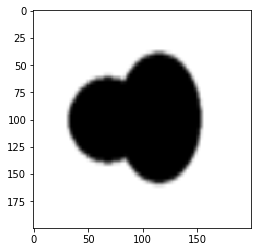

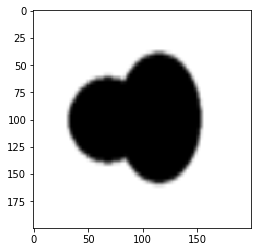

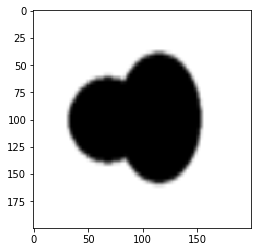

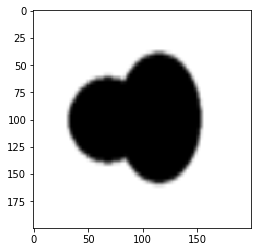

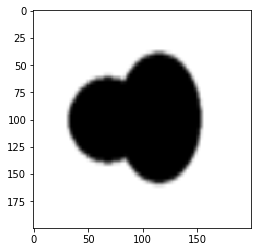

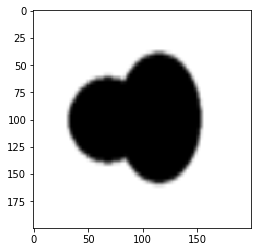

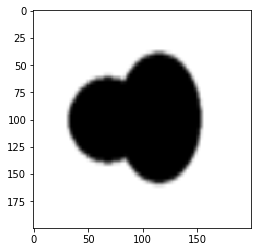

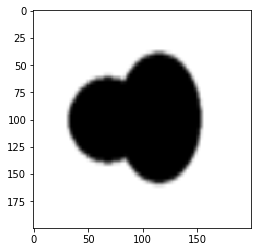

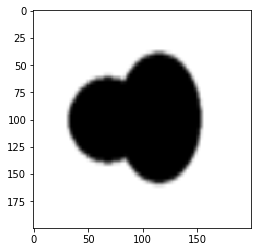

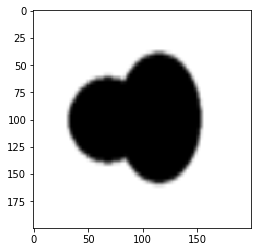

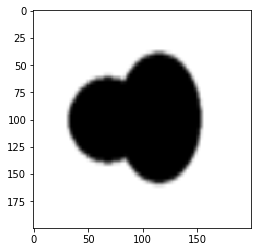

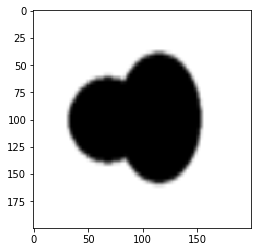

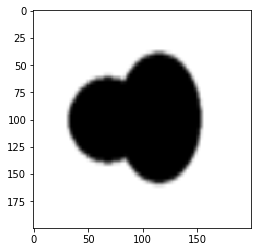

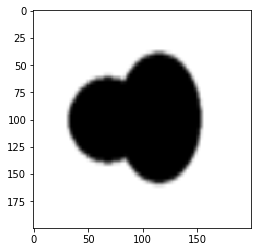

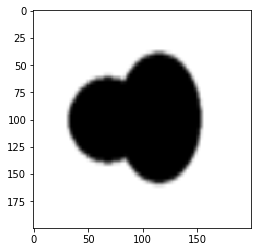

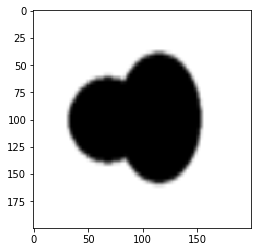

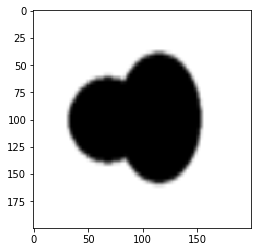

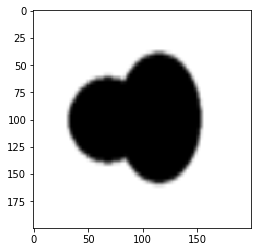

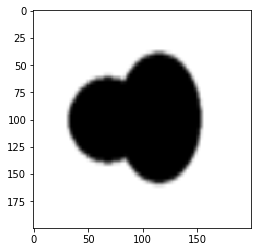

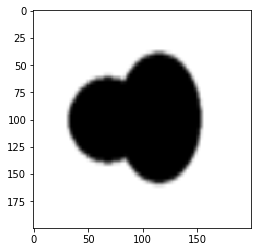

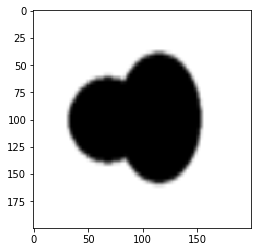

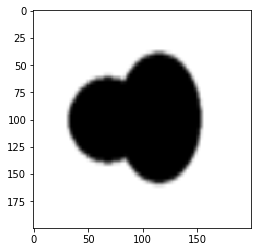

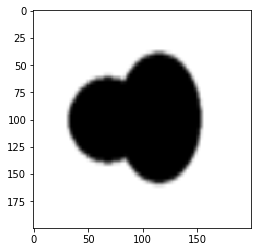

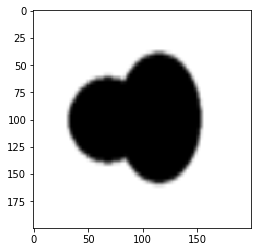

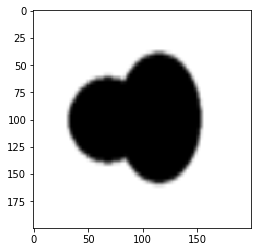

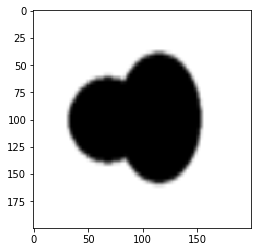

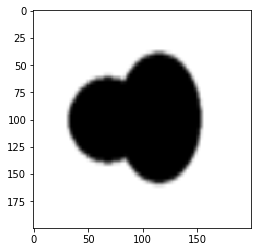

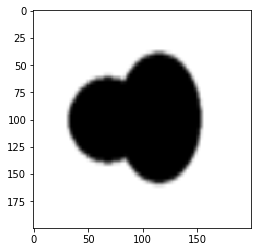

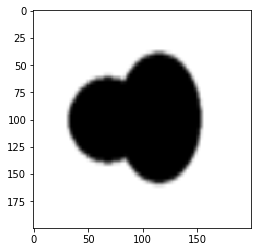

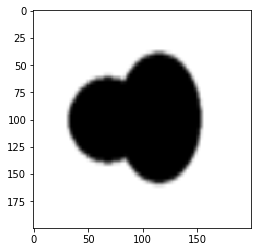

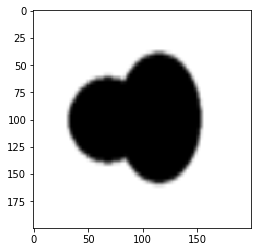

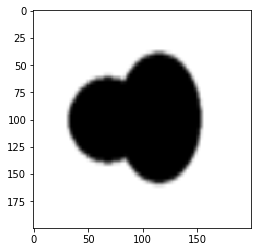

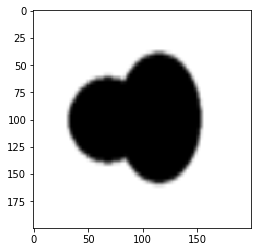

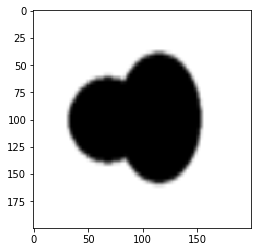

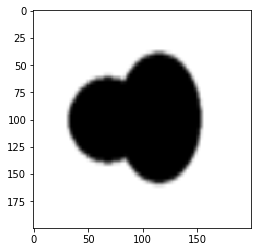

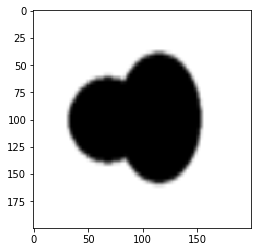

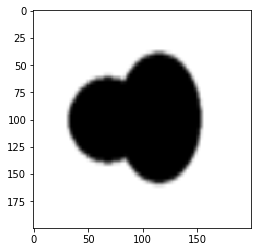

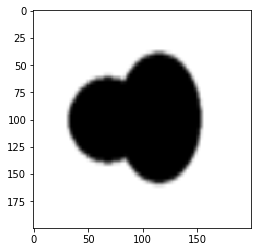

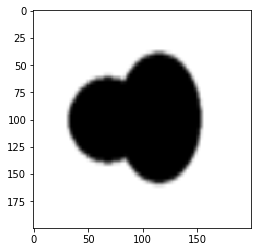

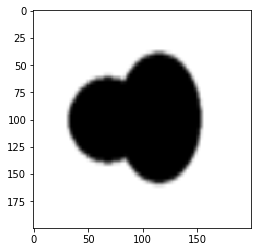

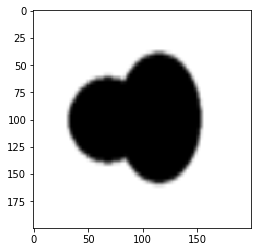

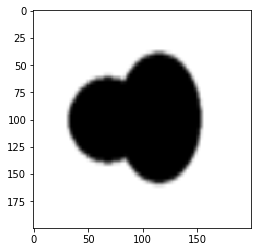

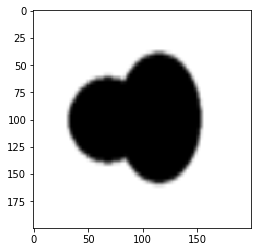

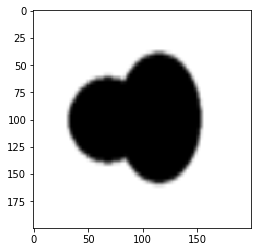

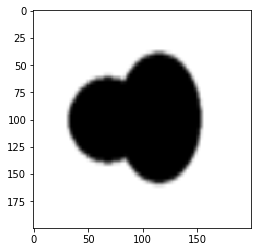

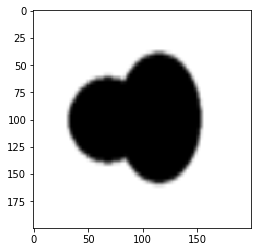

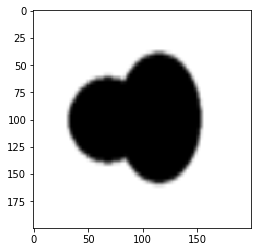

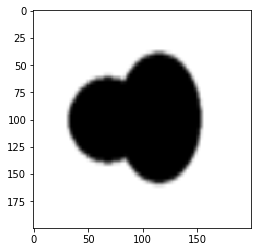

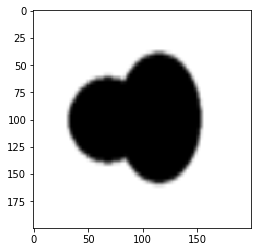

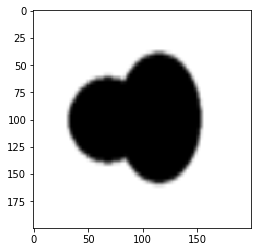

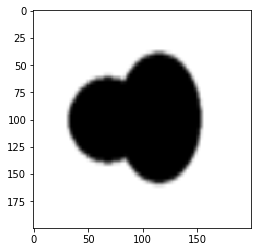

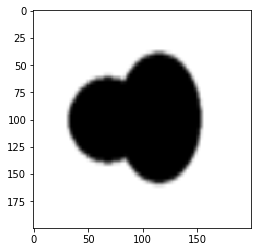

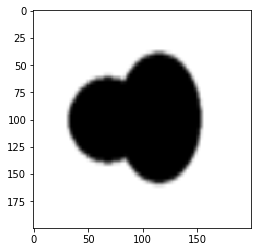

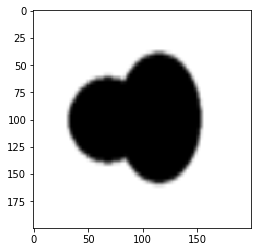

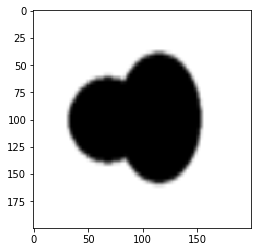

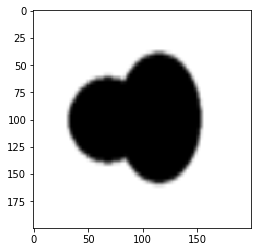

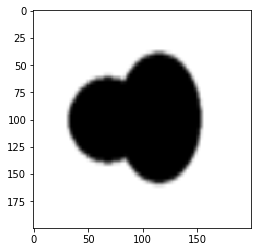

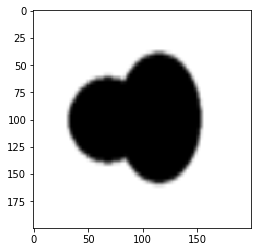

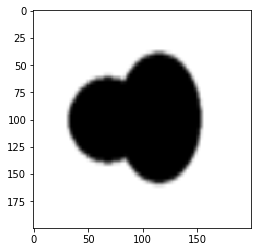

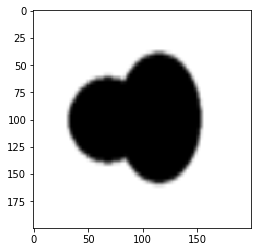

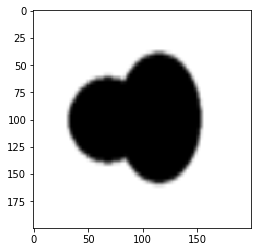

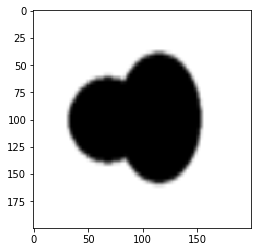

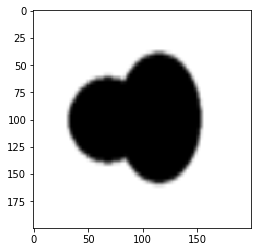

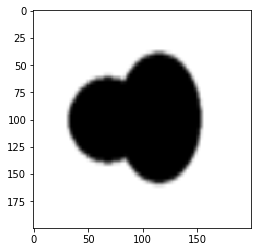

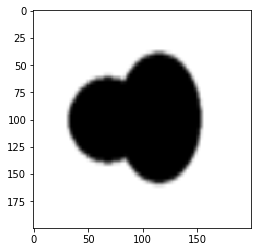

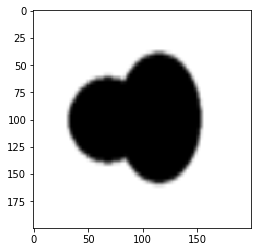

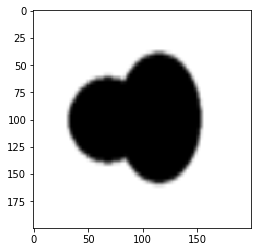

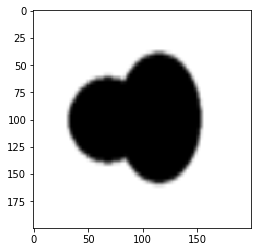

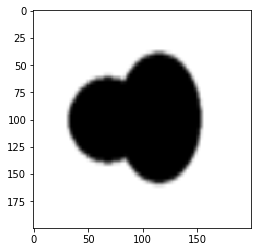

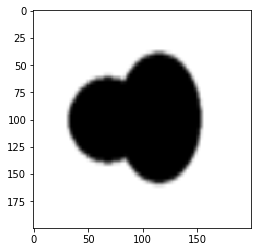

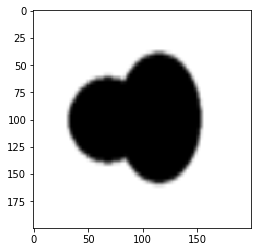

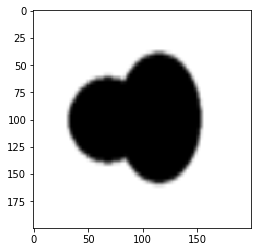

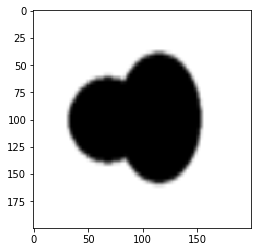

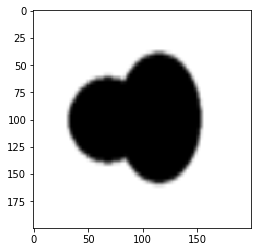

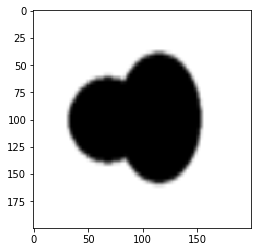

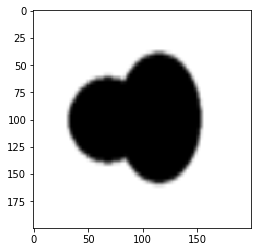

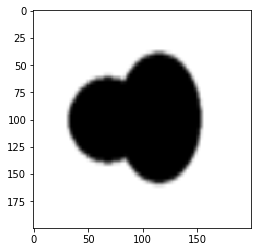

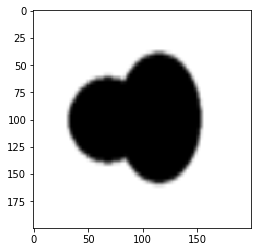

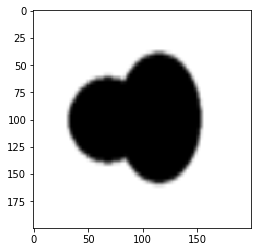

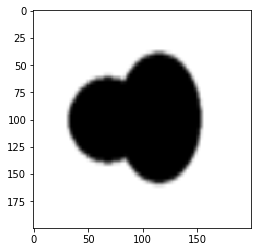

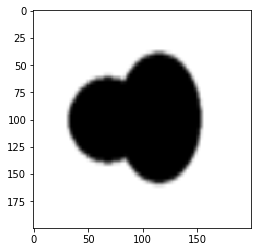

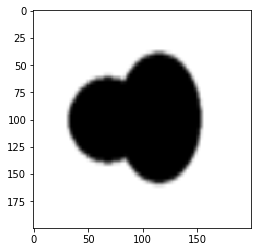

In [20]:
# return phi
n_iter = 1000
for i in range(n_iter):
    dphi = grad(phi)
    dphi_norm = norm(dphi)

    dphi_t = F * dphi_norm

    phi = phi + dt * dphi_t
    
    if i%10 == 0:
        fig2 = plt.figure(2)
        fig2.clf()
        contours = measure.find_contours(phi, 0)
        ax2 = fig2.add_subplot(111)
        ax2.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
        for n, contour in enumerate(contours):
            ax2.plot(contour[:, 1], contour[:, 0], linewidth=2)
        plt.pause(0.3)
plt.pause(5)

In [52]:
img = io.imread('pattern.jpg')
img = color.rgb2gray(img)
img = img - np.mean(img)
image = img

kernels = []
for theta in range(6):
    theta = theta / 6. * np.pi
#     for sigma in (1, 3):
    for sigma in range(1,3):
        for frequency in (0.05, 0.15, 0.30, 0.45):
#         frequency = 0.4
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)


def curvature(f):
    fy, fx = grad(f)
    norm = np.sqrt(fx**2 + fy**2)
    Nx = fx / (norm + 1e-8)
    Ny = fy / (norm + 1e-8)
    return div(Nx, Ny)


def div(fx, fy):
    fyy, fyx = grad(fy)
    fxy, fxx = grad(fx)
    return fxx + fyy


def dot(x, y, axis=0):
    return np.sum(x * y, axis=axis)


v = 1.
dt = 1.
n_iter = 1000
aplha = 10

g = stopping_fun(img_smooth, alpha=10)
x, y = 95,100
phi = default_phi(x,y)


def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = nd.convolve(image, kernel, mode='wrap')
#         cv2.imshow('f',filtered)
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats
    
window_scribble = image[x-8:x+8, y-8:y+8]
scribble_feats = compute_feats(window_scribble, kernels)

top, bottom, left, right = 8, 7, 8, 7
WHITE = [255, 255, 255]
padded_img = cv2.copyMakeBorder(image, top , bottom, left, right, cv2.BORDER_REPLICATE, value=WHITE)

g = np.zeros(image.shape, dtype=np.double)
step = 4
for i in range(8, padded_img.shape[0]-8, step):
    for j in range(8, padded_img.shape[0]-8, step):

        feats = compute_feats(padded_img[i-8:i+8, j-8:j+8], kernels)
#                 print(i,j)
        g[i-8:i-8+step, j-8:j-8+step] = np.sum((feats - scribble_feats)**2)
        g[i-8:i-8+step, j-8:j-8+step] = np.sqrt(g[i-8:i-8+step, j-8:j-8+step])

g = 1 / (1+g)
dg = grad(g)

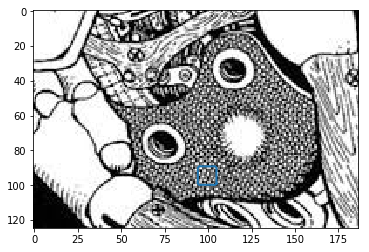

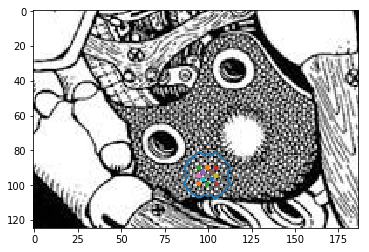

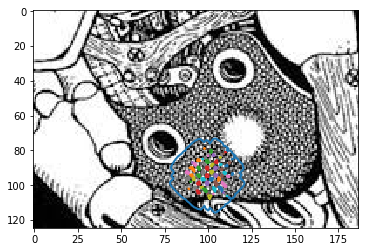

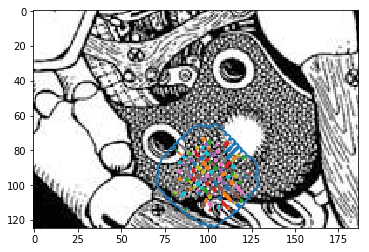

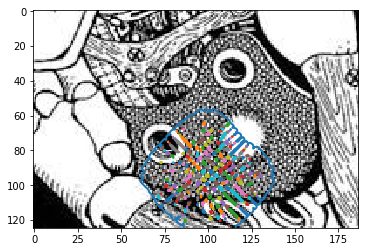

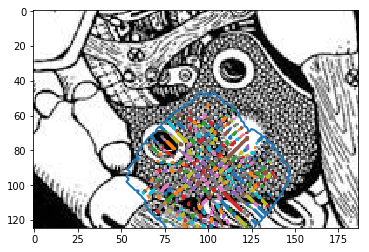

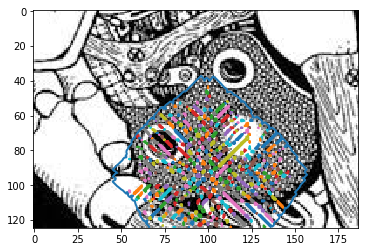

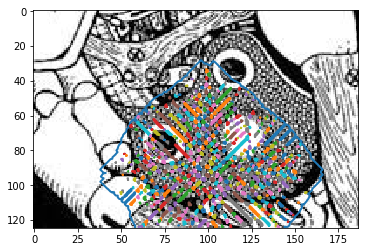

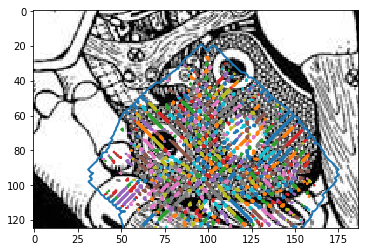

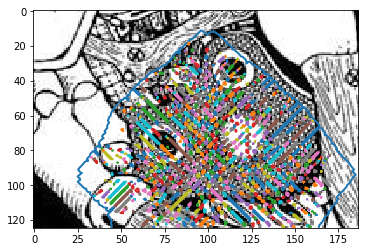

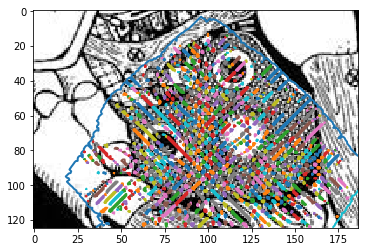

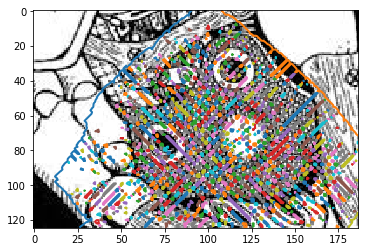

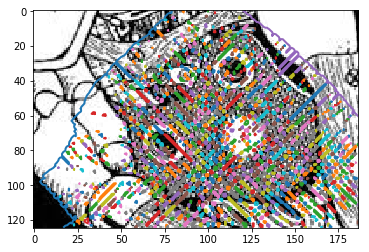

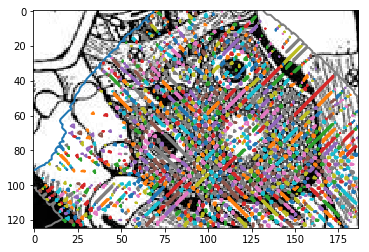

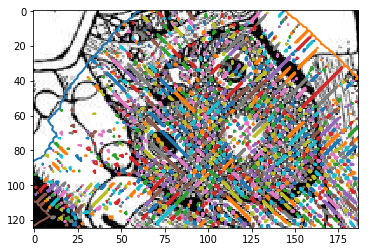

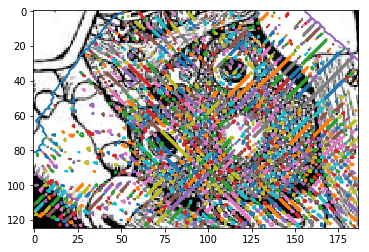

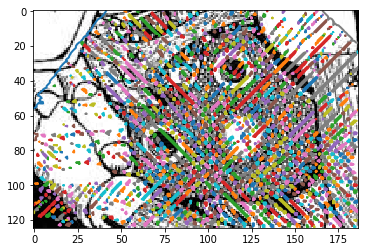

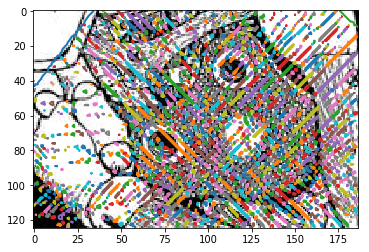

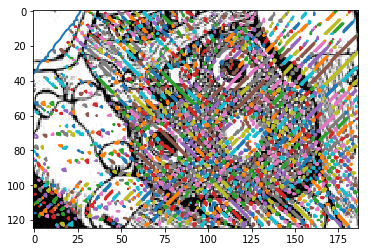

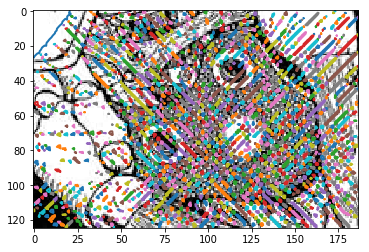

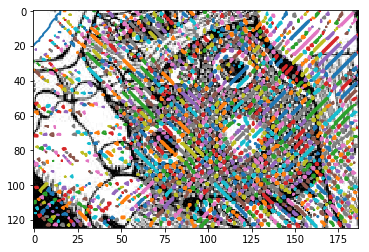

In [ ]:
for i in range(n_iter):
    dphi = grad(phi)
    dphi_norm = norm(dphi)
    kappa = curvature(phi)

    smoothing = g * kappa * dphi_norm
    balloon = g * dphi_norm * v
    attachment = dot(dphi, dg)

    dphi_t = smoothing + balloon + attachment

    phi = phi - dt * dphi_t
    
    if i%10 == 0:
        fig2 = plt.figure(2)
        fig2.clf()
        contours = measure.find_contours(phi, 0)
        ax2 = fig2.add_subplot(111)
        ax2.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
        for n, contour in enumerate(contours):
            ax2.plot(contour[:, 1], contour[:, 0], linewidth=2)
        plt.pause(0.3)
plt.pause(5)

In [1]:
from scipy.misc import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage.filters as filters
from skimage import measure
import numpy as np

class drlse(object):

	def __init__(self, F, lamda, mu, alpha, epsilon, dt, iterations, potential_function):
		self.F = F
		self.lamda = lamda
		self.alpha = alpha
		self.epsilon = epsilon
		self.dt = dt
		self.mu = mu
		self.iter = iterations
		self.potential_function = potential_function

	def drlse_edge(self,phi):
		[vy, vx] = np.gradient(self.F)
		for k in range(self.iter):
		    phi = self.applyNeumann(phi)
		    [phi_y, phi_x] = np.gradient(phi)
		    s = np.sqrt(np.square(phi_x) + np.square(phi_y))
		    smallNumber = 1e-10
		    Nx = phi_x / (s + smallNumber)
		    Ny = phi_y / (s + smallNumber)
		    curvature = self.div(Nx, Ny)
		    if self.potential_function == 'single-well':
		        distRegTerm = filters.laplace(phi, mode='wrap') - curvature
		    elif self.potential_function == 'double-well':
		        distRegTerm = self.distReg_p2(phi)
		    else:
		        print('Error: Wrong choice of potential function. Please input the string "single-well" or "double-well" in the drlse_edge function.')
		    diracPhi = self.Dirac(phi)
		    areaTerm = diracPhi * self.F
		    edgeTerm = diracPhi * (vx * Nx + vy * Ny) + diracPhi * self.F * curvature
		    phi = phi + self.dt * (self.mu * distRegTerm + self.lamda * edgeTerm + self.alpha * areaTerm)
		return phi

	def distReg_p2(self,phi):
	    [phi_y, phi_x] = np.gradient(phi)
	    s = np.sqrt(np.square(phi_x) + np.square(phi_y))
	    a = (s >= 0) & (s <= 1)
	    b = (s > 1)
	    ps = a * np.sin(2 * np.pi * s) / (2 * np.pi) + b * (s - 1)
	    dps = ((ps != 0) * ps + (ps == 0)) / ((s != 0) * s + (s == 0))
	    return self.div(dps * phi_x - phi_x, dps * phi_y - phi_y) + filters.laplace(phi, mode='wrap')

	def div(self,nx, ny):
	    [junk, nxx] = np.gradient(nx)
	    [nyy, junk] = np.gradient(ny)
	    return nxx + nyy

	def Dirac(self,x):
	    f = (1 / 2 / self.epsilon) * (1 + np.cos(np.pi * x / self.epsilon))
	    b = (x <= self.epsilon) & (x >= -self.epsilon)
	    return f * b

	def applyNeumann(self,f):
	    [ny, nx] = f.shape
	    g = f.copy()
	    g[0, 0] = g[2, 2]
	    g[0, nx-1] = g[2, nx-3]
	    g[ny-1, 0] = g[ny-3, 2]
	    g[ny-1, nx-1] = g[ny-3, nx-3]

	    g[0, 1:-1] = g[2, 1:-1]
	    g[ny-1, 1:-1] = g[ny-3, 1:-1]

	    g[1:-1, 0] = g[1:-1, 2]
	    g[1:-1, nx-1] = g[1:-1, nx-3]
	    return g



class levelSet(object):

	def __init__(self, drlse_iter, gradient_iter, lamda, alpha, epsilon, sigma, dt=1, potential_function="double-well"):
		self.lamda = lamda
		self.alpha = alpha
		self.epsilon = epsilon
		self.sigma = sigma
		self.dt = dt
		self.mu = 0.2/self.dt
		self.drlse_iter = drlse_iter
		self.gradient_iter = gradient_iter
		self.potential_function = potential_function

	def initializePhiAtScribble(self,image,x,y):
		c0 = 4
		phi = c0 * np.ones(image.shape)
		phi[x-5:x+5, y-3:y+3] = -c0
		return phi

	def visualization(self,image,phi):
		fig2 = plt.figure(2)
		fig2.clf()
		contours = measure.find_contours(phi, 0)
		ax2 = fig2.add_subplot(111)
		ax2.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
		for n, contour in enumerate(contours):
			ax2.plot(contour[:, 1], contour[:, 0], linewidth=2)

	def calculateF(self,image):
		img_smooth = filters.gaussian_filter(image, self.sigma)
		[Iy, Ix] = np.gradient(img_smooth)
		f = np.square(Ix) + np.square(Iy)
		return 1 / (1+f)

	def gradientDescent(self,image,x,y):
		phi = self.initializePhiAtScribble(image,x,y)
		#F = self.calculateF(image)
        
		lse = drlse(F, self.lamda, self.mu, self.alpha, self.epsilon, self.dt, self.drlse_iter, self.potential_function)
		for n in range(self.gradient_iter):
			phi = lse.drlse_edge(phi)
			if np.mod(n, 20) == 0:			
				self.visualization(image,phi)
				plt.pause(0.3)
		plt.pause(5)

def main():

	# iter_inner, iter_outer, lamda, alpha, epsilon, sigma, dt, potential_function
	# potential_function="single-well"

	image = imread('1.png', True)
	image = np.array(image,dtype='float32')
	LS = levelSet(4,101,2,-9,2.0,0.8)
	LS.gradientDescent(image,240,150)


if __name__ == '__main__':
	main()

/home/neil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:129: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


FileNotFoundError: [Errno 2] No such file or directory: '1.png'